In [39]:
import pandas as pd
import numpy as np
import mesa
from partymodel import PartyModel
import seaborn as sns
import matplotlib.pyplot as plt

## Watts-Strogatz Batch Runs

In [ ]:
# I thought about the different variations of parameter sweeps I could do; 
# ultimately, these are what I decided upon because this was what i was most interested in,
# (different types of networks), also, 
# I could not get the parallelization on the Midway Cluster to work, 
# so I had to keep my batch run to a manageable size

params = {'neighbor_dance_thres':0.5,
            'alcohol_dance_thres': 2,
            'energy':15,
            'alcohol_prop':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
            'extro_floor':0,
            'extro_ceiling':1,
            'k': range(2,16),
            'p': np.arange(0.01, 0.11, 0.01),
            'network_type':"wattsstrogatz",
            'seed':[0,2,4,6,8,10]}

results = mesa.batch_run(
PartyModel,
params,
iterations = 1,
max_steps = 100,
#data_collection_period = 1,
number_processes = 2
)

  0%|          | 0/9240 [00:00<?, ?it/s]

In [87]:
df = pd.DataFrame(results)
df.head()

,RunId,iteration,Step,neighbor_dance_thres,alcohol_dance_thres,energy,alcohol_prop,extro_floor,extro_ceiling,k,p,network_type,seed,Dancing Queens,Party Poopers,Kaput,Dancing Queens Ratio,Total Cumulative DQ Integral,Total Dancing Steps
0,0,0,100,0.5,2,15,0.0,0,1,2,0.01,wattsstrogatz,0,0,25,0,0.0,0,0
1,1,0,100,0.5,2,15,0.0,0,1,2,0.01,wattsstrogatz,2,0,25,0,0.0,0,0
2,2,0,100,0.5,2,15,0.0,0,1,2,0.01,wattsstrogatz,4,0,25,0,0.0,0,0
3,3,0,100,0.5,2,15,0.0,0,1,2,0.01,wattsstrogatz,6,0,25,0,0.0,0,0
4,4,0,100,0.5,2,15,0.0,0,1,2,0.01,wattsstrogatz,8,0,25,0,0.0,0,0


In [101]:
# rounding floats for easier analysis
df['p'] = df['p'].round(2)
df['k'] = df['k'].astype(int)

Text(0.5, 1.0, 'Proportion of Alcohol Drinkers vs Total Dancing Volume - Watts-Strogatz')

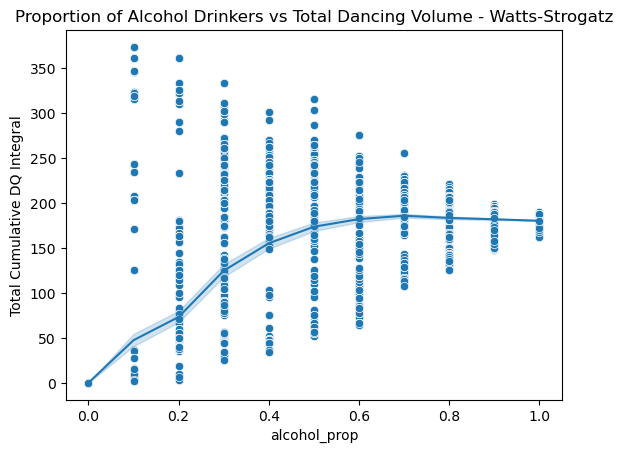

In [102]:
sns.scatterplot(data=df,
                x="alcohol_prop",
                y="Total Cumulative DQ Integral")
sns.lineplot(data=df,
                x="alcohol_prop",
                y="Total Cumulative DQ Integral")

plt.title('Proportion of Alcohol Drinkers vs Total Dancing Volume - Watts-Strogatz')

Text(0.5, 1.0, 'Proportions of Alcohol Drinkers vs Total Dancing Volume - Watts-Strogatz')

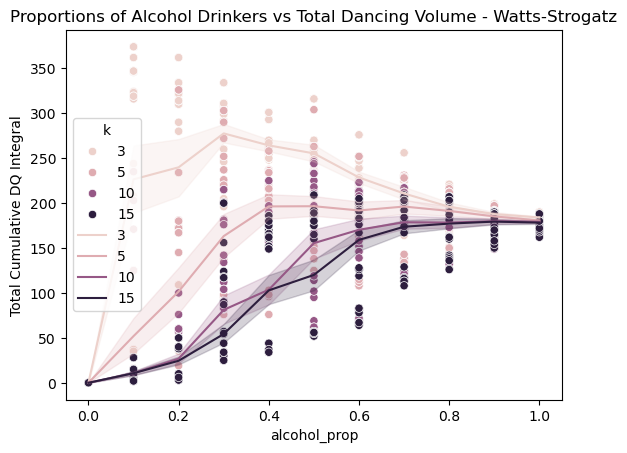

In [109]:
sns.scatterplot(data=df[df['k'].isin([3, 5, 10, 15])],
                x='alcohol_prop',
                y='Total Cumulative DQ Integral',
                hue='k')
sns.lineplot(data=df[df['k'].isin([3, 5, 10, 15])],
                x='alcohol_prop',
                y='Total Cumulative DQ Integral',
                hue='k')

plt.title('Proportions of Alcohol Drinkers vs Total Dancing Volume - Watts-Strogatz')

Text(0.5, 1.0, 'Proportions of Alcohol Drinkers vs Total Dancing Volume - Watts-Strogatz')

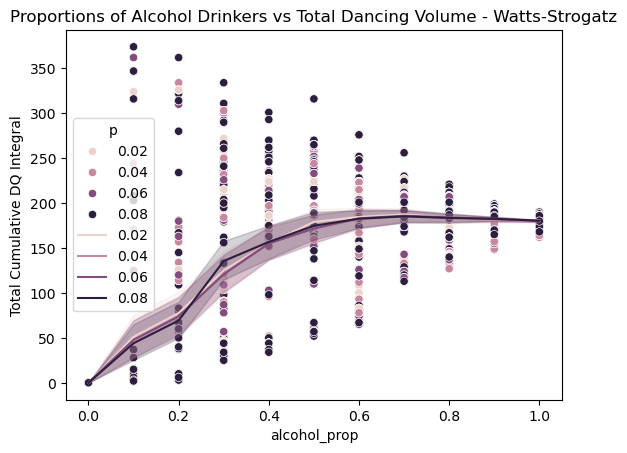

In [110]:
sns.scatterplot(data=df[df['p'].isin([0.02, 0.04, 0.06, 0.08,])],
                x='alcohol_prop',
                y='Total Cumulative DQ Integral',
                hue='p')
sns.lineplot(data=df[df['p'].isin([0.02, 0.04, 0.06, 0.08,])],
                x='alcohol_prop',
                y='Total Cumulative DQ Integral',
                hue='p')

plt.title('Proportions of Alcohol Drinkers vs Total Dancing Volume - Watts-Strogatz')

Text(0.5, 1.0, 'Proportions of Alcohol Drinkers vs Dancing Duration - Watts-Strogatz')

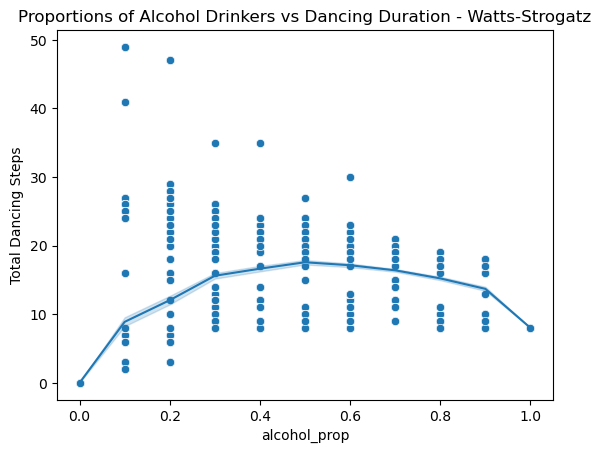

In [111]:
sns.scatterplot(data=df,
                x="alcohol_prop",
                y="Total Dancing Steps")
sns.lineplot(data=df,
                x="alcohol_prop",
                y="Total Dancing Steps")

plt.title('Proportions of Alcohol Drinkers vs Dancing Duration - Watts-Strogatz')

Text(0.5, 1.0, 'Proportion of Alcohol Drinkers vs Dancing Duration - Watts-Strogatz')

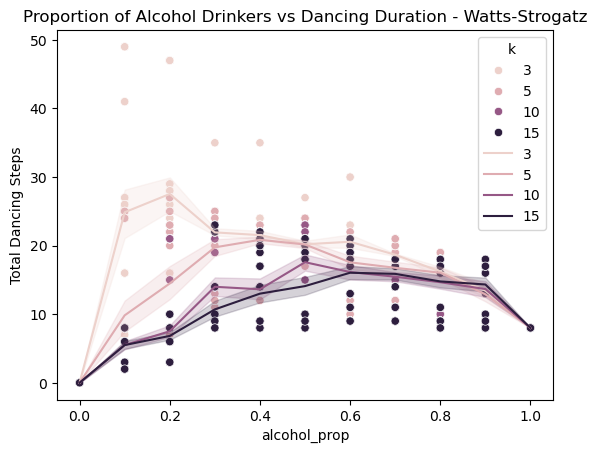

In [108]:
sns.scatterplot(data=df[df['k'].isin([3, 5, 10, 15])],
                x="alcohol_prop",
                y="Total Dancing Steps",
                hue="k")
sns.lineplot(data=df[df['k'].isin([3, 5, 10, 15])],
                x="alcohol_prop",
                y="Total Dancing Steps",
                hue="k")
plt.title('Proportion of Alcohol Drinkers vs Dancing Duration - Watts-Strogatz')

Text(0.5, 1.0, 'Proportion of Alcohol Drinkers vs Dancing Duration - Watts-Strogatz')

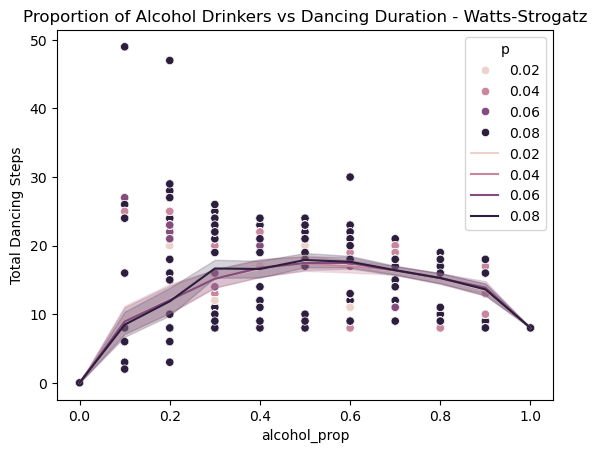

In [112]:
sns.scatterplot(data=df[df['p'].isin([0.02, 0.04, 0.06, 0.08,])],
                x="alcohol_prop",
                y="Total Dancing Steps",
                hue="p")
sns.lineplot(data=df[df['p'].isin([0.02, 0.04, 0.06, 0.08,])],
                x="alcohol_prop",
                y="Total Dancing Steps",
                hue="p")
plt.title('Proportion of Alcohol Drinkers vs Dancing Duration - Watts-Strogatz')

In [115]:
davis_params = params = {'neighbor_dance_thres':0.5,
            'alcohol_dance_thres': 2,
            'energy':15,
            'alcohol_prop':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
            'extro_floor':0,
            'extro_ceiling':1,
            'k': 2,
            'p': 0.1,
            'network_type':"davis",
            'seed':range(0, 100)}

davis_results = mesa.batch_run(
PartyModel,
davis_params,
iterations = 1,
max_steps = 100,
#data_collection_period = 1,
number_processes = 3
)

  0%|          | 0/1100 [00:00<?, ?it/s]

In [116]:
df_davis = pd.DataFrame(davis_results)

Text(0.5, 1.0, 'Proportion of Alcohol Drinkers vs Total Dancing Volume - Davis Southern Women')

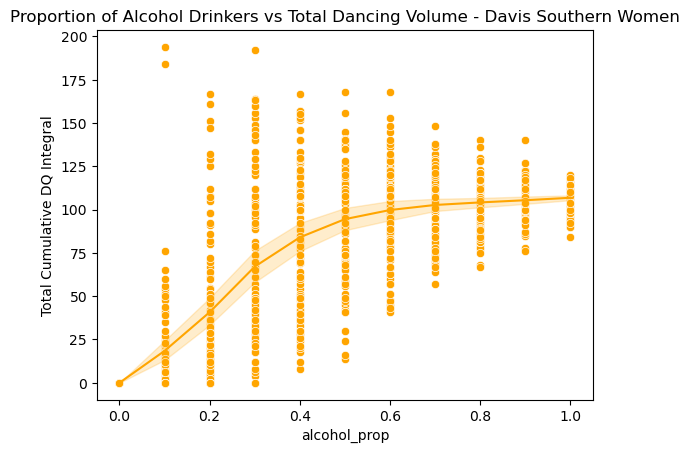

In [125]:
sns.scatterplot(data=df_davis,
                x="alcohol_prop",
                y='Total Cumulative DQ Integral',
                color='orange')
sns.lineplot(data=df_davis,
                x="alcohol_prop",
                y='Total Cumulative DQ Integral',
                color='orange')
plt.title('Proportion of Alcohol Drinkers vs Total Dancing Volume - Davis Southern Women')

Text(0.5, 1.0, 'Proportion of Alcohol Drinkers vs Dancing Duration - Davis Southern Women')

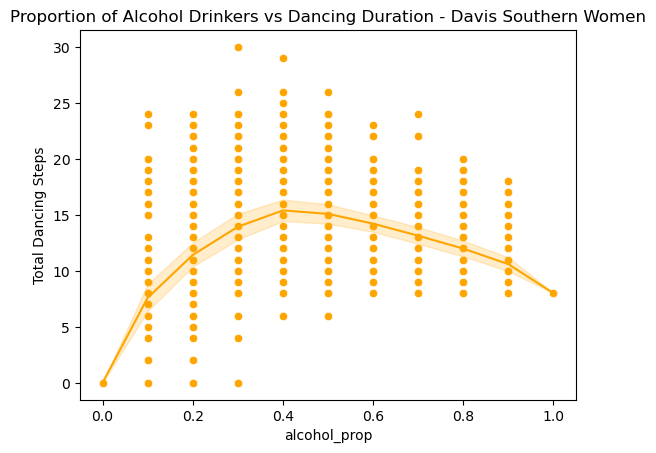

In [126]:
sns.scatterplot(data=df_davis,
                x="alcohol_prop",
                y='Total Dancing Steps',
                color='orange')
sns.lineplot(data=df_davis,
                x="alcohol_prop",
                y='Total Dancing Steps',
                color='orange')
plt.title('Proportion of Alcohol Drinkers vs Dancing Duration - Davis Southern Women')

In [119]:
florentine_params = params = {'neighbor_dance_thres':0.5,
            'alcohol_dance_thres': 2,
            'energy':15,
            'alcohol_prop':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
            'extro_floor':0,
            'extro_ceiling':1,
            'k': 2,
            'p': 0.1,
            'network_type':"florentine",
            'seed':range(0, 100)}

florentine_results = mesa.batch_run(
PartyModel,
florentine_params,
iterations = 1,
max_steps = 100,
#data_collection_period = 1,
number_processes = 3
)

  0%|          | 0/1100 [00:00<?, ?it/s]

In [120]:
df_florentine = pd.DataFrame(florentine_results)

Text(0.5, 1.0, 'Proportion of Alcohol Drinkers vs Total Dancing Volume - Florentine Families')

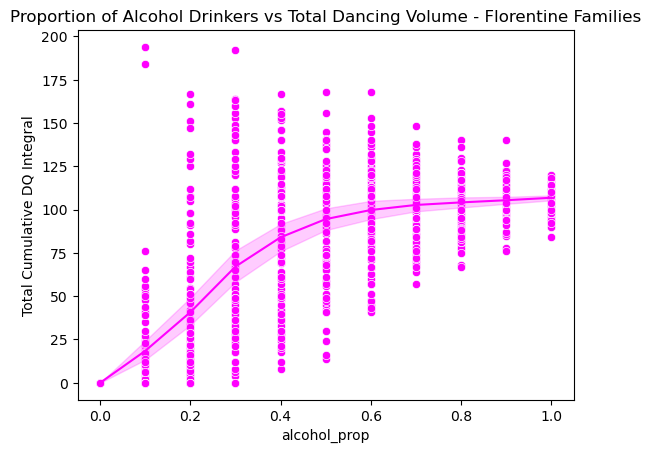

In [127]:
sns.scatterplot(data=df_florentine,
                x="alcohol_prop",
                y="Total Cumulative DQ Integral",
                color='magenta')
sns.lineplot(data=df_florentine,
                x="alcohol_prop",
                y="Total Cumulative DQ Integral",
                color='magenta')
plt.title('Proportion of Alcohol Drinkers vs Total Dancing Volume - Florentine Families')

Text(0.5, 1.0, 'Proportion of Alcohol Drinkers vs Dancing Duration - Florentine Families')

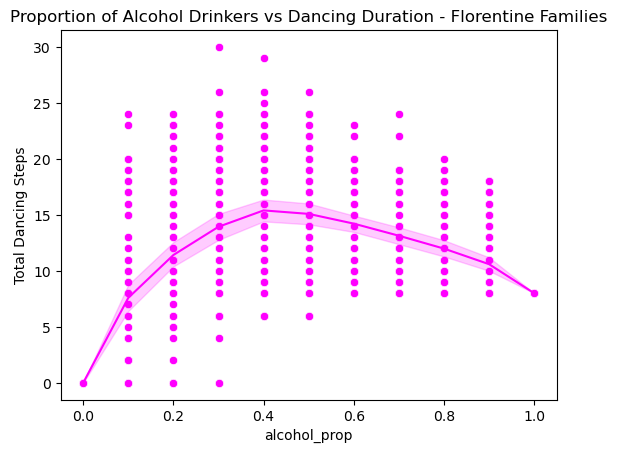

In [129]:
sns.scatterplot(data=df_florentine,
                x="alcohol_prop",
                y="Total Dancing Steps",
                color='magenta')
sns.lineplot(data=df_florentine,
                x="alcohol_prop",
                y="Total Dancing Steps",
                color='magenta')
plt.title('Proportion of Alcohol Drinkers vs Dancing Duration - Florentine Families')